In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sentence_transformers import SentenceTransformer

In [3]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [8]:
df_raw = pd.read_csv("data/combined_neuro_trials_with_interventions_20240325.csv")
df_raw = df_raw[['nct_id', 'Neurological Disease', 'Disease Class', 'brief_summary_description']].drop_duplicates()

In [9]:
# Group by 'nct_id' and 'brief_summary_description' and aggregate other columns
df = df_raw.groupby(['nct_id', 'brief_summary_description']).agg({
    'Neurological Disease': '|'.join,
    'Disease Class': '|'.join
}).reset_index()

# Define a function to remove 'unknown' values
def remove_unknown(value):
    return '|'.join(filter(lambda x: x != 'unknown', value.split('|')))

# Post-processing step to remove 'unknown' values from 'Disease Class'
df['Disease Class'] = df['Disease Class'].apply(remove_unknown)

df.head()

,nct_id,brief_summary_description,Neurological Disease,Disease Class
0,NCT00000117,To determine whether high-dose intravenous imm...,Optic Neuritis,Cranial Nerve Diseases
1,NCT00000121,To determine whether the preoperative use of p...,Esotropia,Cranial Nerve Diseases
2,NCT00000127,To assess the safety and efficacy of optic ner...,Ischemic Optic Neuropathy,Cranial Nerve Diseases
3,NCT00000128,To test the hypothesis that correction with bi...,Myopia|Strabismus|Esophoria,Cranial Nerve Diseases
4,NCT00000146,To assess the beneficial and adverse effects o...,Multiple Sclerosis|Optic Neuritis,Demyelinating Diseases|Cranial Nerve Diseases


In [10]:
df_raw.shape, df.shape

((93343, 4), (46376, 4))

In [11]:
len(set(df['Disease Class']))

1042

# Load Data

In [7]:
df = pd.read_csv('data/annotated_aact/normalized_annotations_unique_19607_with_details.csv')

In [8]:
df.shape

(19607, 7)

In [9]:
df.head()

,Unnamed: 0,nct_id,canonical_BioLinkBERT-base_interventions,canonical_BioLinkBERT-base_conditions,Disease Class,brief_title,brief_summary_description
0,0,NCT00000117,intravenous immunoglobulin|ivig,multiple sclerosis|optic neuritis,Cranial Nerve Diseases,Intravenous Immunoglobulin Therapy in Optic Ne...,To determine whether high-dose intravenous imm...
1,12,NCT00000146,corticosteroid,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases,Optic Neuritis Treatment Trial (ONTT),To assess the beneficial and adverse effects o...
2,108,NCT00000147,corticosteroid,multiple sclerosis|optic neuritis,Cranial Nerve Diseases|Demyelinating Diseases,Longitudinal Optic Neuritis Study (LONS),To assess the beneficial and adverse effects o...
3,204,NCT00000151,acetylsalicylic acid|aspirin,blindness|diabetes mellitus|diabetic retinopat...,Neurologic Manifestations|unknown,Early Treatment Diabetic Retinopathy Study (ET...,To evaluate the effectiveness of both argon la...
4,524,NCT00000170,atropine,amblyopia|anisometropia|moderate amblyopia|str...,Neurologic Manifestations,Occlusion Versus Pharmacologic Therapy for Mod...,To determine whether the success rate with dru...


In [10]:
# Calculate the number of words in each brief_summary_description
df['word_count'] = df['brief_summary_description'].apply(lambda x: len(x.split()))

# Adjusting the bins to include a category for more than 1000 words
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
bin_labels = ['1-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1001+']

# Plotting the distribution of word counts without specifying bins (each observation represented)
df['word_count_bin'] = pd.cut(df['word_count'], bins=bins, labels=bin_labels, right=False)


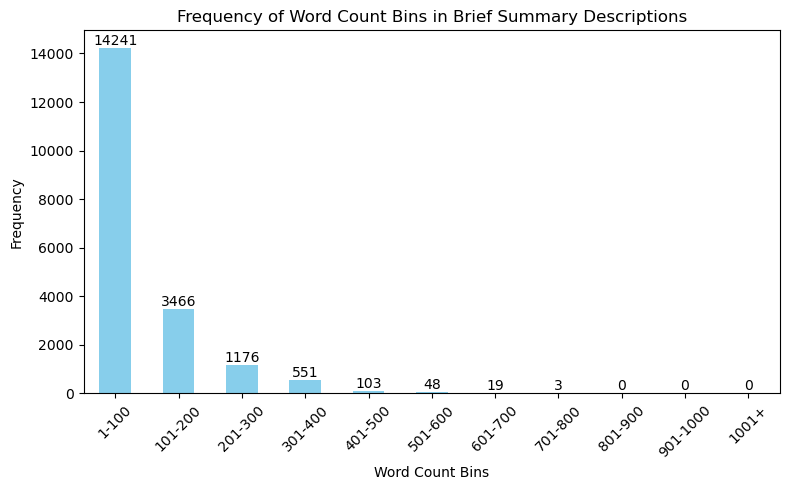

In [11]:
bin_counts = df['word_count_bin'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bar_plot = bin_counts.plot(kind='bar', color='skyblue')

# Annotate each bar with its count
for i, count in enumerate(bin_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Frequency of Word Count Bins in Brief Summary Descriptions')
plt.xlabel('Word Count Bins')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()